In [1]:
try:
    import google.colab  # noqa: F401

    %pip install -q daml
except Exception:
    pass

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import numpy as np
import tensorflow_datasets as tfds

from daml.detectors import Duplicates

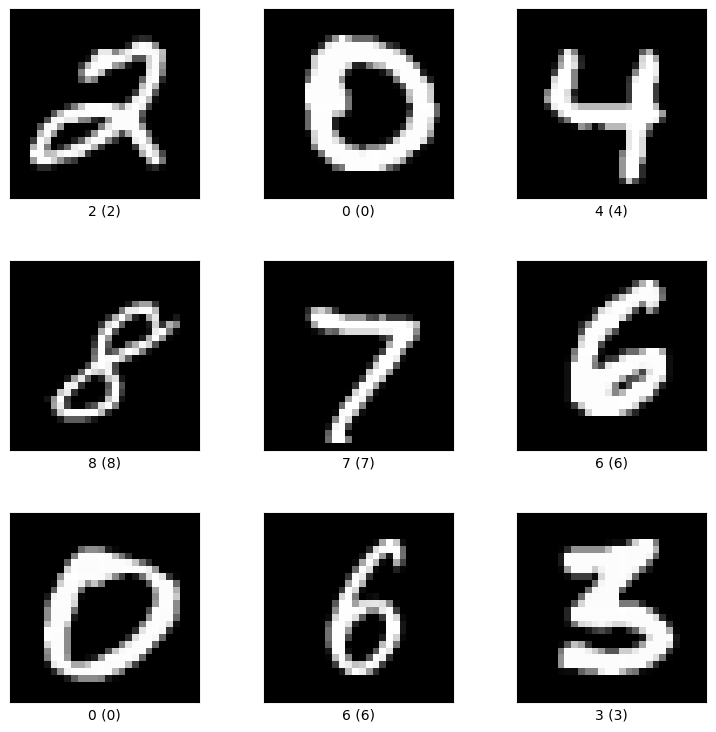

In [3]:
# Load in the mnist dataset from tensorflow datasets
dataset, ds_info = tfds.load(
    "mnist",
    split="test",
    shuffle_files=True,
    with_info=True,
)  # type: ignore
tfds.visualization.show_examples(dataset, ds_info)  # type: ignore

# Translate the dataset from tensorflow to numpy for use with the duplicates class
labels = np.array([i["label"] for i in dataset])  # type: ignore
test_data = [i["image"] for i in dataset]  # type: ignore
test_data = np.squeeze(np.array(test_data, dtype=np.float32).transpose(0, 3, 1, 2))

In [4]:
# Creating some duplicates
print("Exact duplicates")
duplicates = {}
for i in [1, 2, 5, 9]:
    matching_indices = np.where(labels == i)[0]
    test_data[matching_indices[78]] = test_data[matching_indices[23]]
    print(f"\t{i} - ({matching_indices[23]}, {matching_indices[78]})")
    duplicates[i] = (matching_indices[23], matching_indices[78], matching_indices[2])

Exact duplicates
	1 - (274, 706)
	2 - (210, 648)
	5 - (285, 887)
	9 - (193, 825)


In [5]:
print("Number of samples: ", len(test_data))

Number of samples:  10000


In [6]:
# Initialize the Duplicates class
duplicator = Duplicates(test_data)  # type: ignore

# Evaluate the data
results = duplicator.evaluate()

In [7]:
for category, images in results.items():
    print(f"{category} - {len(images)}")
    print(f"\t{images}")

exact - 4
	[[193, 825], [210, 648], [274, 706], [285, 887]]
near - 97
	[[92, 6629], [108, 2709], [245, 1063, 3633, 7862], [278, 8502, 8701], [281, 5004], [287, 608, 2535, 2794, 5240, 5653, 6127, 6183, 7664, 7667, 8540], [301, 9350], [366, 1432, 1939, 2282, 3413, 5326, 5433, 7157], [424, 1538], [470, 7409], [499, 4108, 9488], [539, 601, 3605, 4100, 6842, 8560], [559, 5566], [606, 1773, 2821], [756, 944], [834, 4975], [853, 6144], [889, 897], [892, 1413, 1668, 1756, 3916, 7295, 7519, 8126], [902, 3336, 6153], [919, 3323, 9007], [940, 8019], [1001, 8358], [1125, 4576], [1133, 2075], [1172, 2032], [1186, 3914], [1214, 1454], [1279, 3989], [1309, 4097, 6349], [1417, 9500], [1422, 5472], [1426, 3639, 4682, 8042, 8185], [1496, 1853], [1597, 5109], [1650, 4870], [1676, 1875, 3241, 5519, 5967], [1693, 2495], [1719, 6977], [1751, 7869], [1767, 4838], [1865, 7605], [1998, 5517, 6645, 6684, 8083], [2105, 4839], [2113, 6393], [2234, 7422], [2260, 4832, 8622, 9484, 9878], [2350, 2807], [2428, 5502],